In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("telecom.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
394,3951-NJCVI,Female,1,Yes,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.05,3944.5,No
6673,3798-EPWRR,Female,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,43.95,85.1,No
1167,4189-NAKJS,Male,0,No,No,26,Yes,Yes,DSL,No,...,No,No,No,No,One year,Yes,Credit card (automatic),51.55,1295.4,No
3912,3882-IYOIJ,Female,0,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.25,6758.45,No
5932,4192-GORJT,Male,0,Yes,No,5,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,498.1,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [8]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [9]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [10]:
df1.TotalCharges.dtypes

dtype('O')

In [11]:
tenchurn_no=df1[df1.Churn=='No'].tenure
tenchurn_yes=df1[df1.Churn=='Yes'].tenure

Text(0, 0.5, 'number of customer')

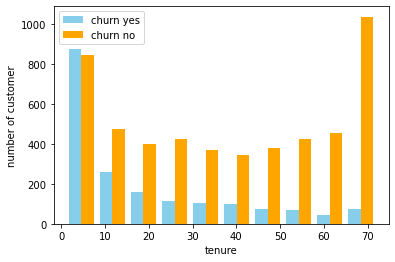

In [12]:
plt.hist([tenchurn_yes,tenchurn_no],color=['skyblue','orange'],label=['churn yes','churn no'])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("number of customer")

Text(0, 0.5, 'number of customer')

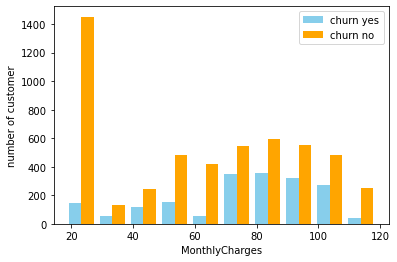

In [13]:
tenchurn_no=df1[df1.Churn=='No'].MonthlyCharges
tenchurn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([tenchurn_yes,tenchurn_no],color=['skyblue','orange'],label=['churn yes','churn no'])
plt.legend()
plt.xlabel("MonthlyCharges")
plt.ylabel("number of customer")

In [14]:
def print_unique_col_value(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [15]:
print_unique_col_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [16]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\MY HP\AppData\Local\Temp\ipykernel_996\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\MY HP\AppData\Local\Temp\ipykernel_996\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [17]:
print_unique_col_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [18]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\MY HP\AppData\Local\Temp\ipykernel_996\3182397683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [19]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:[0 1]


In [20]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\MY HP\AppData\Local\Temp\ipykernel_996\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [21]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [22]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3009,0,0,0,0,1,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
748,0,0,1,0,48,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1451,0,0,0,0,18,1,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3291,1,0,1,1,24,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1608,0,0,0,0,17,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [24]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [25]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[col_to_scale]=scaler.fit_transform(df2[col_to_scale])

In [26]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5145,0,0,1,1,0.915493,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3373,1,1,0,0,0.014085,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3743,0,0,0,1,0.042254,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3690,1,0,0,0,0.323944,0,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
6946,1,0,0,1,0.661972,0,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0


In [27]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [28]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [30]:
xtrain.shape

(5625, 26)

In [31]:
xtest.shape

(1407, 26)

In [32]:
ytrain.shape

(5625,)

In [33]:
ytest.shape

(1407,)

In [34]:
xtrain[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [35]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
    
])
model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.4787 - accuracy: 0.7698
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.7996
Epoch 3/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8066
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8080
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8068
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8078
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8087
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8108
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8114
Epoch 10/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8080

In [36]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7882


[0.4482536315917969, 0.7882018685340881]

In [37]:
yp=model.predict(xtest)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.13395995],
       [0.52398425],
       [0.01481055],
       [0.69842136],
       [0.4720457 ]], dtype=float32)

In [38]:
ytest[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [39]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [40]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.66      0.57      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'truth')

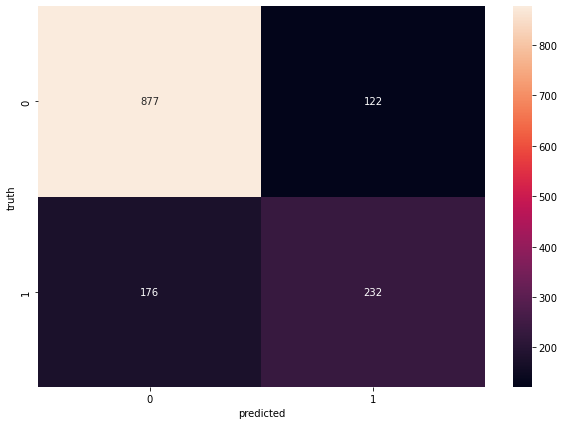

In [42]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')


# handling imbalanced dataset

# under sampling

In [43]:
#count class
countclass0,countclass1=df1.Churn.value_counts()
dfclass0=df2[df2['Churn']==0]
dfclass1=df2[df2['Churn']==1]

In [44]:
dfclass0.shapedf

(5163, 27)

In [45]:
dfclass1.shape

(1869, 27)

In [46]:
dfclass0under=dfclass0.sample(countclass1)
dftestunder=pd.concat([dfclass0under,dfclass1],axis=0)
print("random user sampling:")
print(dftestunder.Churn.value_counts())

random user sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [47]:
x=dftestunder.drop('Churn',axis='columns')
y=dftestunder['Churn']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)



In [48]:
ytrain.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [49]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
    
])
model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 0.6057 - accuracy: 0.7000
Epoch 2/50
94/94 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7482
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.7599
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7612
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7622
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7609
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7679
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7656
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7689
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7719
Epoch 11/50
94/94 [

In [50]:
model.evaluate(xtest,ytest)

24/24 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7393


[0.5115674138069153, 0.7393048405647278]

In [51]:
yp=model.predict(xtest)
yp[:5]
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

24/24 [==============================] - 0s 2ms/step


In [52]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       374
           1       0.74      0.74      0.74       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



# 2.oversampling

In [53]:
countclass0,countclass1

(5163, 1869)

In [54]:
dfclass1.shape

(1869, 27)

In [55]:
dfclass1over=dfclass1.sample(countclass0,replace=True)
dfclass1over.shape

(5163, 27)

In [56]:
dftestover=pd.concat([dfclass0,dfclass1over],axis=0)
dftestover.shape

(10326, 27)

In [57]:
print(dftestover.Churn.value_counts())

0    5163
1    5163
Name: Churn, dtype: int64


In [58]:
x=dftestover.drop('Churn',axis='columns')
y=dftestover['Churn']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)


In [59]:
ytrain.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [60]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
    
])
model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=50)
model.evaluate(xtest,ytest)
yp=model.predict(xtest)
yp[:5]
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Epoch 1/50
259/259 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7289
Epoch 2/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.7590
Epoch 3/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7638
Epoch 4/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7667
Epoch 5/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7683
Epoch 6/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7684
Epoch 7/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7763
Epoch 8/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7783
Epoch 9/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7785
Epoch 10/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4651 - accuracy: 0.7786

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1033
           1       0.75      0.85      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



# 3 smote

In [62]:
#x=df2.drop('Churn',axis='columns')
#y=df2['Churn']

In [63]:
#y.value_counts()

In [64]:
#import imblearn *
#smote=SMOTE(sam='minority')
#xsm,ysm=smote.fit_sample(x,y)
#ysm.value_counts()

# 4 use of ensemble with undersampling

In [65]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [66]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [68]:
ytrain.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [69]:
df3=xtrain.copy()

In [70]:
df3['Churn']=ytrain

In [71]:
df3class0=df3[df3.Churn==0]
df3class1=df3[df3.Churn==1]

In [72]:
df3class0.shape,df3class1.shape

((4130, 27), (1495, 27))

In [75]:
def get_train_batch(df_majority,dfminority,start,end):
    dftrain=pd.concat([df3class0[start:end],df3class1],axis=0)
    dftrain.shape
    